In [67]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid

In [69]:
# bandwidth = 0.05
# grid_x    = grid(bandwidth, start=-20, end=30)

# IR = 50
# n1, n2 = 10, int(IR * 10)
# mu1 = np.random.normal(-5, np.sqrt(0.1), n1)
# mu1_plus = np.random.normal(5, np.sqrt(0.1), n1)

# mu2 = np.random.normal(5, np.sqrt(1.), n2)
# sig1 = np.ones_like(mu1)*3
# sig2 = np.ones_like(mu2)*3

# G1 = (1)*generateGauss(mu1, sig1, grid_x) # + 0*generateGauss(mu1_plus, sig1, grid_x)
# G2 = generateGauss(mu2, sig2, grid_x)
# G_data = np.vstack([G1, G2])

# # Save F_data to an .npz file
# np.savez("../dataset/G_data.npz", G_data=G_data, grid_x=grid_x, bandwidth=bandwidth)

In [72]:
bandwidth = 0.01
grid_x = grid(bandwidth, start=-20, end=20)

rng = np.random.default_rng(42)

# Cụm lớn nhiều, hẹp
n_big = 900
mu_big = rng.normal(-5, 1.0, n_big)       # quanh -5
sig_big = np.full(n_big, 2.0)             # hẹp

# Cụm nhỏ ít, rộng (đuôi chồng lấn)
n_small = 30
mu_small = rng.normal(5, 1.0, n_small)    # quanh +5
sig_small = np.full(n_small, 4.0)         # rộng, dễ tràn qua trái

# Sinh PDF
G1 = generateGauss(mu_big, sig_big, grid_x)
G2 = generateGauss(mu_small, sig_small, grid_x)

# Gộp lại
G_data = np.vstack([G1, G2])
np.savez("../dataset/G_data.npz", G_data=G_data, grid_x=grid_x, bandwidth=bandwidth)


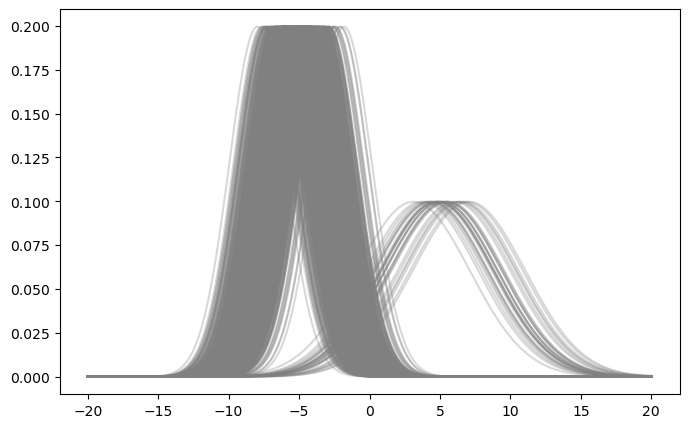

In [73]:
plt.figure(figsize=(8, 5))
for i in range(G_data.shape[0]):
	 plt.plot(grid_x, G_data[i], color='gray', alpha=0.3)